## Imports

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

## Helper functions

In [262]:
def create_scatter_subplots(data_df, plot_details_list, figsize=(35,5), plot_type = 'scatter'): 
    """plots the line graph based on input parameters

    Args:
        data_df(dataframe) : the dataframe whose columns are to be plotted
        plot_details_list (list): it contains the below fields in same exact order
            x (dataframe): data to be plotted on x axis
            y (dataframe): data to be plotted on y axis      
            title (str) : title of the plot
            xlabel (str) : description of x axis
            ylabel (str) : description of y axis
            color (str) : color of the line plot        
        figsize (str) : size of the plot       

    Returns:
        plot: a subplot with reqd graphs using mentioned parameters
    """
     
    rows = len(plot_details_list) % 3
    columns = 3
    if rows < columns:
        rows = 1
        columns = len(plot_details_list)
    figure, axis = plt.subplots(rows, columns, figsize=figsize)
       
    for i in range(0,len(plot_details_list)):
        x = data_df[plot_details_list[i][0]]
        y = data_df[plot_details_list[i][1]]
        title = plot_details_list[i][2]
        xlabel = plot_details_list[i][3]
        ylabel = plot_details_list[i][4]
        color = plot_details_list[i][5]
        rotation = 0
        if rows == 1 and columns == 1:
            if plot_type == 'scatter':
                axis.scatter(x, y, color =color)
            elif plot_type == 'plot':
                axis.plot(x, y, color =color)
            elif plot_type == 'bar':
                axis.plot(x, y, color =color)
            axis.set_title(title)
            plt.setp(axis.get_xticklabels(), rotation=rotation)
            axis.set_xlabel(xlabel)
            axis.set_ylabel(ylabel)
        else:
            if plot_type == 'scatter':
                axis[i].scatter(x, y, color =color)
            elif plot_type == 'plot':
                axis[i].plot(x, y, color =color)
            elif plot_type == 'bar':
                axis[i].bar(x, y, color =color)            
            axis[i].set_title(title)
            plt.setp(axis[i].get_xticklabels(), rotation=rotation)
            axis[i].set_xlabel(xlabel)
            axis[i].set_ylabel(ylabel)
            
def plot_series(series, plot_details, figsize = (35,5), plot = 'plot'):
    title = plot_details[0]
    xlabel = plot_details[1]
    ylabel = plot_details[2]
    color = plot_details[3]
    figure, axis = plt.subplots(1, 1, figsize=figsize)
    if plot == 'bar':
        axis.bar(series.index, series.values, color = color)
    if plot == 'plot':
        axis.plot(series.index, series.values, color = color)
    axis.set_title(title)
    try: rotation = plot_details[4]
    except: rotation = 0
    plt.setp(axis.get_xticklabels(), rotation=rotation)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    plt.show()
    
def load_dataframe(path, basic = False):
    """loads the dataframe from the csv file and returns transformed df based on flag

    Args:
        basic (bool) : if True basic loading and returning of df done, else transformation into years        
        path (str) : path of csv file      

    Returns:
        df: transformed/ loaded df
    """
    df = pd.read_csv(path)
    if basic:        
        return df
    df = df.drop(['Country Code', 'Indicator Code'], axis =1)
    year_df = df.set_index(['Country Name', 'Indicator Name'])
    country_df = year_df.stack().unstack('Country Name')
    country_df.index.names = ['Indicator Name', 'years']
    return year_df, country_df 

def create_country_level_indicator_plots(country_name, indicator_plots_details):
    """creates a grid of plots mentioned in indicator plot details

    Args:
        indicator_plots_details (list): the list of indicator plot details as requested       
        country_name (str) : name of the country whose data is to be taken for plots creation      

    Returns:
        plot: a subplot with reqd graphs using mentioned parameters
    """
    indicators_df_year = pd.DataFrame(year_df.loc[country_name]).T
    create_scatter_subplots(indicators_df_year, indicator_plots_details, figsize=(18,3))

## Analysing countries metadata

In [104]:
countries_df = load_dataframe('data/Metadata_Country_API_19_DS2_en_csv_v2_3931355.csv', basic = True)

#### Low income countries based on region

In [107]:
pd.DataFrame(countries_df[countries_df['IncomeGroup']=='Low income'].groupby('Region').count()['Country Code'])

,Country Code
Region,
East Asia & Pacific,1
Middle East & North Africa,2
South Asia,1
Sub-Saharan Africa,23


we can see that most low income contries lie in the sub-saharan africa region, we shall consider one country from the same region for our analysis

#### High income countries based on region

In [119]:
pd.DataFrame(countries_df[countries_df['IncomeGroup']=='High income'].groupby('Region').count()['Country Code'])

,Country Code
Region,
East Asia & Pacific,14
Europe & Central Asia,37
Latin America & Caribbean,16
Middle East & North Africa,8
North America,3
Sub-Saharan Africa,1


In [120]:
countries_df.loc[(countries_df['IncomeGroup']=='High income') & (countries_df['Region']=='Sub-Saharan Africa')]

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
225,SYC,Sub-Saharan Africa,High income,NaN,Seychelles,NaN


## Analysing Climate Changes data 

In [7]:
year_df, country_df = load_dataframe('data/final.csv')

In [257]:
selected_countries = ['Seychelles', 'United Kingdom', 'Afghanistan', 'Singapore']

In [258]:
stats_df = country_df.groupby(level=0).aggregate(['first','last','min','max', 'mean'])[selected_countries+["World"]].loc[['Urban population (% of total population)','Agricultural land (% of land area)','CO2 emissions (kt)']]
stats_df

Country Name                             Seychelles                        \
                                              first        last       min   
Indicator Name                                                              
Urban population (% of total population)  27.673000   57.546000  27.67300   
Agricultural land (% of land area)        10.869565    3.369565   3.26087   
CO2 emissions (kt)                         7.334000  620.000000   7.33400   

Country Name                                                      \
                                                 max        mean   
Indicator Name                                                     
Urban population (% of total population)   57.546000   47.421967   
Agricultural land (% of land area)         13.043478    9.092954   
CO2 emissions (kt)                        750.000000  277.473661   

Country Name                             United Kingdom                \
                                                  first          last   
Indicator Name                                                          
Urban population (% of total population)      78.444000      83.90300   
Agricultural land (% of land area)            81.841855      71.71852   
CO2 emissions (kt)                        584299.780000  358800.00000   

Country Name                                                            \
                                                    min            max   
Indicator Name                                                           
Urban population (% of total population)      77.030000      83.903000   
Agricultural land (% of land area)            70.073988      81.841855   
CO2 emissions (kt)                        358800.000000  660863.073000   

Country Name                                             ...    Singapore  \
                                                   mean  ...        first   
Indicator Name                                           ...                
Urban population (% of total population)      79.162885  ...   100.000000   
Agricultural land (% of land area)            74.812834  ...    20.895522   
CO2 emissions (kt)                        549193.673966  ...  1393.460000   

Country Name                                                        \
                                                  last         min   
Indicator Name                                                       
Urban population (% of total population)    100.000000  100.000000   
Agricultural land (% of land area)            0.930889    0.930889   
CO2 emissions (kt)                        47360.000000  674.728000   

Country Name                                                          \
                                                   max          mean   
Indicator Name                                                         
Urban population (% of total population)    100.000000    100.000000   
Agricultural land (% of land area)           20.895522      7.395028   
CO2 emissions (kt)                        47430.000000  30234.056831   

Country Name                                     World                \
                                                 first          last   
Indicator Name                                                         
Urban population (% of total population)  3.361797e+01  5.615635e+01   
Agricultural land (% of land area)        3.596509e+01  3.690352e+01   
CO2 emissions (kt)                        9.463838e+06  3.404105e+07   

Country Name                                                          \
                                                   min           max   
Indicator Name                                                         
Urban population (% of total population)  3.361797e+01  5.615635e+01   
Agricultural land (% of land area)        3.596509e+01  3.889515e+01   
CO2 emissions (kt)                        9.423934e+06  3.404105e+07   

Country Name                                            
    

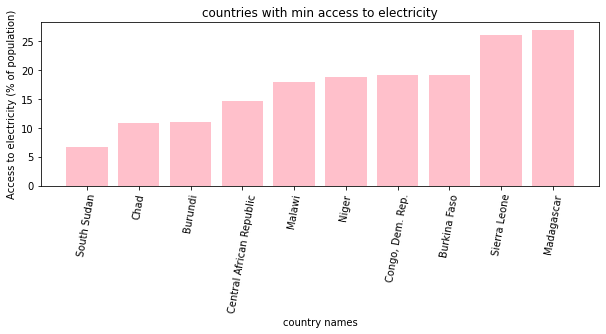

In [274]:
data = country_df.groupby(level=0).max().loc['Access to electricity (% of population)'].sort_values()[:10]
plot_details = ['countries with min access to electricity', 'country names', 'Access to electricity (% of population)', 'pink', 80]
plot_series(data, plot_details, figsize = (10,3), plot = 'bar')

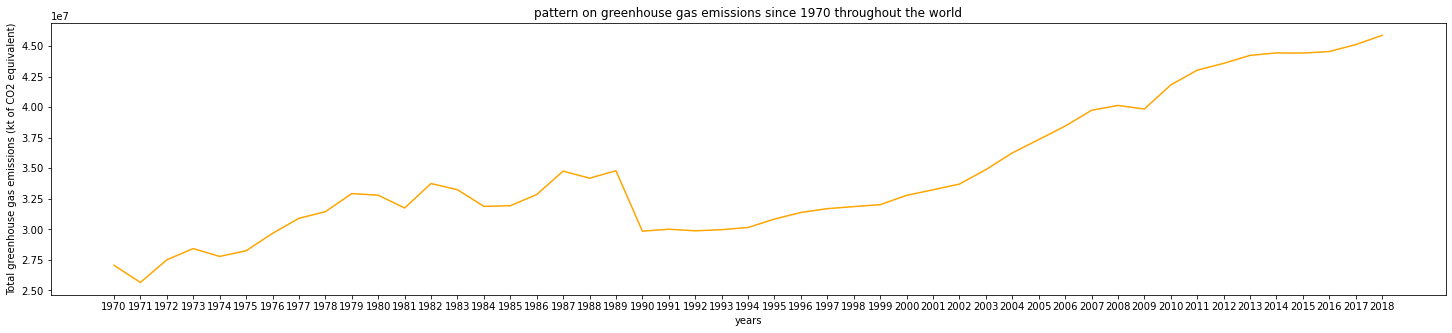

In [256]:
data = pd.DataFrame(country_df.loc['Total greenhouse gas emissions (kt of CO2 equivalent)']['World'])
plot_details = ['pattern on greenhouse gas emissions since 1970 throughout the world', 'years', 'Total greenhouse gas emissions (kt of CO2 equivalent)', 'orange']
plot_series(data, plot_details, figsize = (25,5), plot = 'plot')

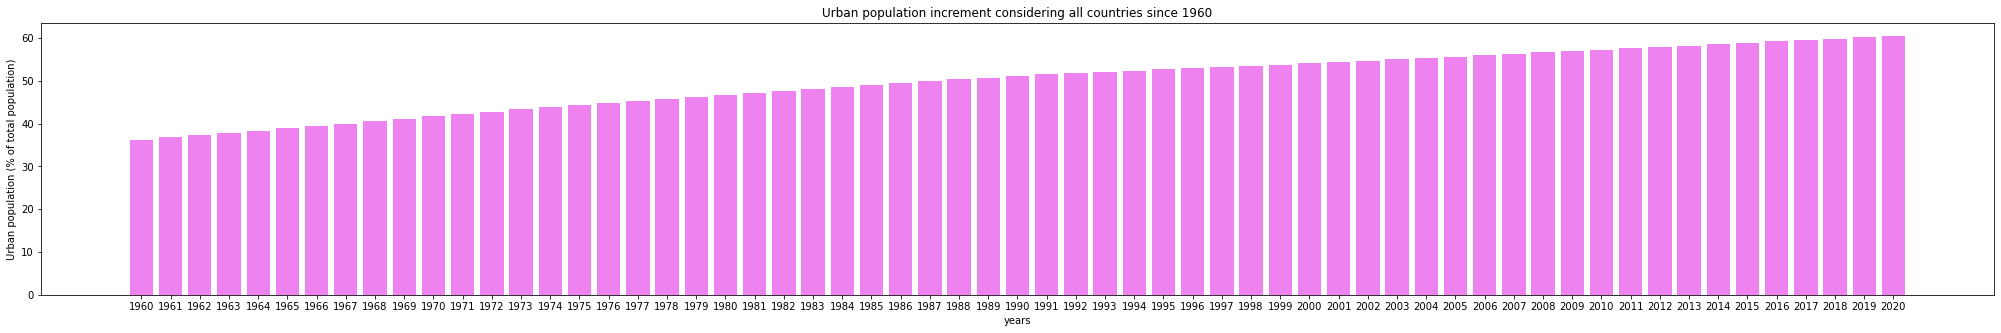

In [197]:
data = year_df.groupby(level=1).mean().loc['Urban population (% of total population)']
plot_details = ['Urban population increment considering all countries since 1960', 'years', 'Urban population (% of total population)', 'violet']
plot_series(data, plot_details, figsize = (35,5), plot = 'bar')

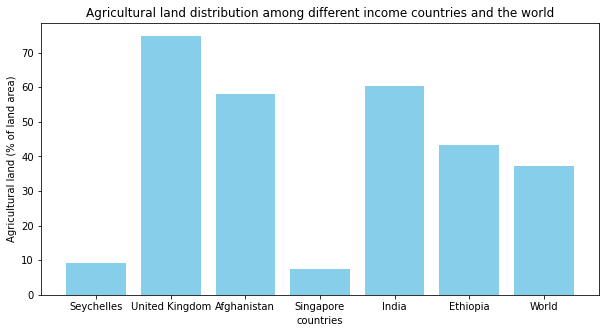

In [233]:
data = stats_df.xs('mean', axis=1, level=1, drop_level=True).loc['Agricultural land (% of land area)']
plot_details = ['Agricultural land distribution among different income countries and the world', 'countries', 'Agricultural land (% of land area)', 'skyblue']
plot_series(data, plot_details, figsize = (10,5), plot = 'bar')

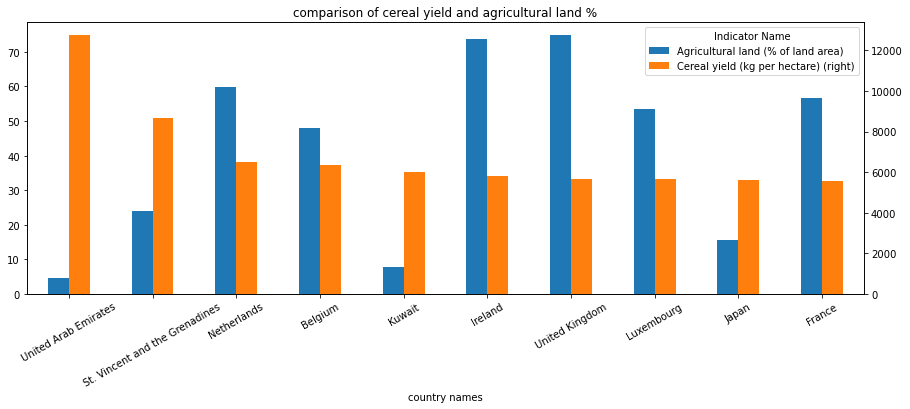

In [254]:
data = country_df.groupby(level =0).mean().loc[['Agricultural land (% of land area)', 'Cereal yield (kg per hectare)']].T.dropna().sort_values(by = 'Cereal yield (kg per hectare)', ascending = False).reset_index().head(10)
# figure, axis = plt.subplots(1, 1, figsize=(10,5))
data.plot(x="Country Name", y=['Agricultural land (% of land area)', 'Cereal yield (kg per hectare)'], secondary_y = 'Cereal yield (kg per hectare)', kind="bar", figsize=(15,5), rot = 30, title = 'comparison of cereal yield and agricultural land %', xlabel = 'country names')
plt.show()

## Correlations between indicators

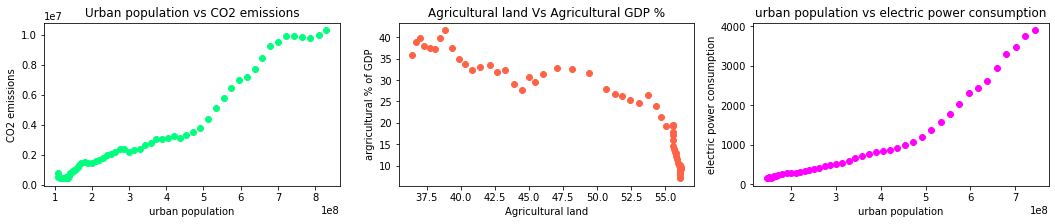

In [95]:
plot_details_list = [['Urban population','CO2 emissions (kt)', 'Urban population vs CO2 emissions', 'urban population', 'CO2 emissions', 'springgreen'], 
                        ['Agricultural land (% of land area)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Agricultural land Vs Agricultural GDP %','Agricultural land', 'argricultural % of GDP', 'tomato'],
                        ['Urban population', 'Electric power consumption (kWh per capita)', 'urban population vs electric power consumption','urban population', 'electric power consumption', 'magenta']]

create_country_level_indicator_plots('China', plot_details_list)

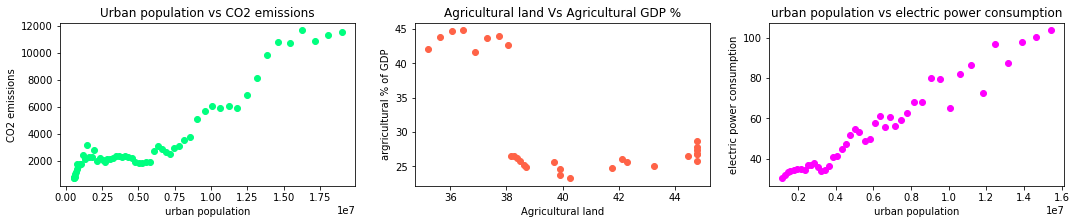

In [275]:
create_country_level_indicator_plots('Tanzania', plot_details_list)

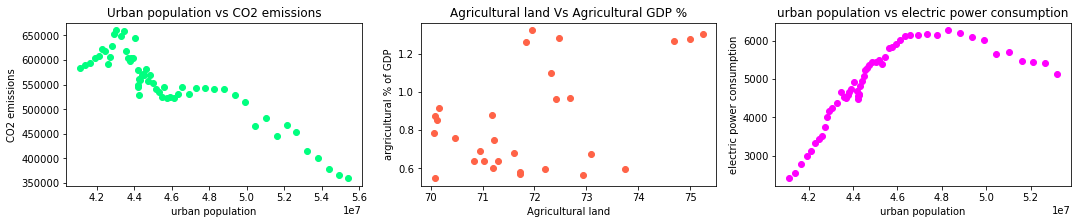

In [97]:
create_country_level_indicator_plots('United Kingdom', plot_details_list)

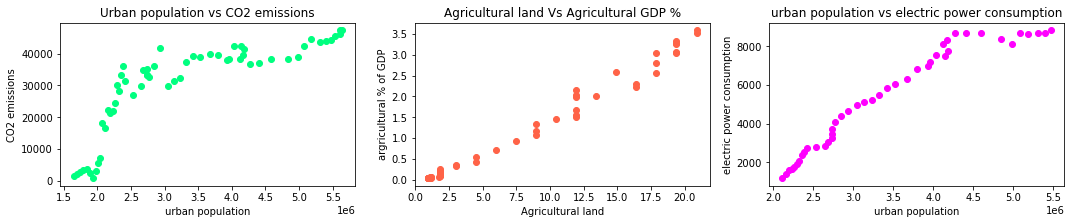

In [98]:
create_country_level_indicator_plots('Singapore', plot_details_list)

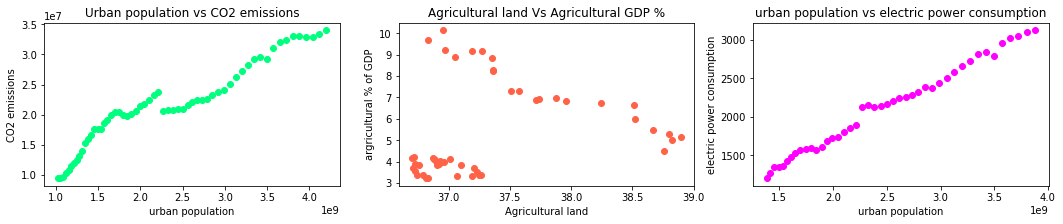

In [116]:
create_country_level_indicator_plots('World', plot_details_list)